In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Daily TSLA index for 10 years from 2013
# https://www.nasdaq.com/market-activity/index/tsla/historical  < NO! DOES NOT INC SPLIT ADJUSTED CLOSE! USE YAHOO!
# https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Select max date range and download csv file
csv_file = '../data/tsla_HistoricalData.csv'

df = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Adj Close'])
df.head()

,Date,Adj Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [22]:
df.rename(columns={'Price': 'Pre-split Price'}, inplace=True)
df.rename(columns={'Adj Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Price
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [23]:
# daily change in business working days 52 * 5 = 260 - 8 public holidays = 252
df['Change'] = df['Price'].pct_change(periods=252) * 100
df.tail()

,Price,Change
Date,,
2023-11-30,240.080002,32.765581
2023-12-01,238.830002,22.665642
2023-12-04,235.580002,20.996408
2023-12-05,238.720001,22.508468
2023-12-06,239.369995,31.197588


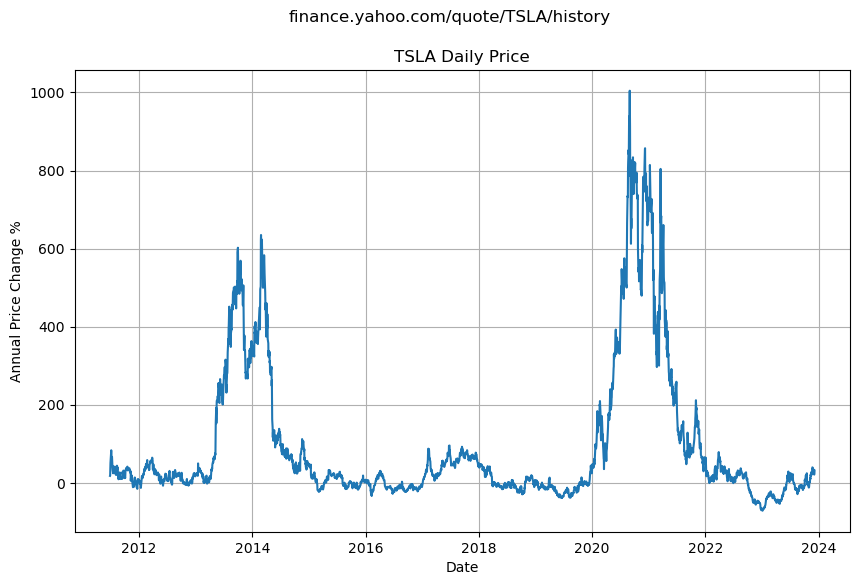

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Change'])
plt.xlabel('Date')
plt.ylabel('Annual Price Change %')
plt.suptitle('finance.yahoo.com/quote/TSLA/history')
plt.title('TSLA Daily Price')
plt.grid(True)
plt.show()

In [27]:
df['3_yr_rolling'] = df['Change'].rolling(window=252*36, min_periods=1).mean()
df.tail()

,Price,Change,3_yr_rolling
Date,,,
2023-11-30,240.080002,32.765581,95.593520
2023-12-01,238.830002,22.665642,95.570213
2023-12-04,235.580002,20.996408,95.546387
2023-12-05,238.720001,22.508468,95.523060
2023-12-06,239.369995,31.197588,95.502522


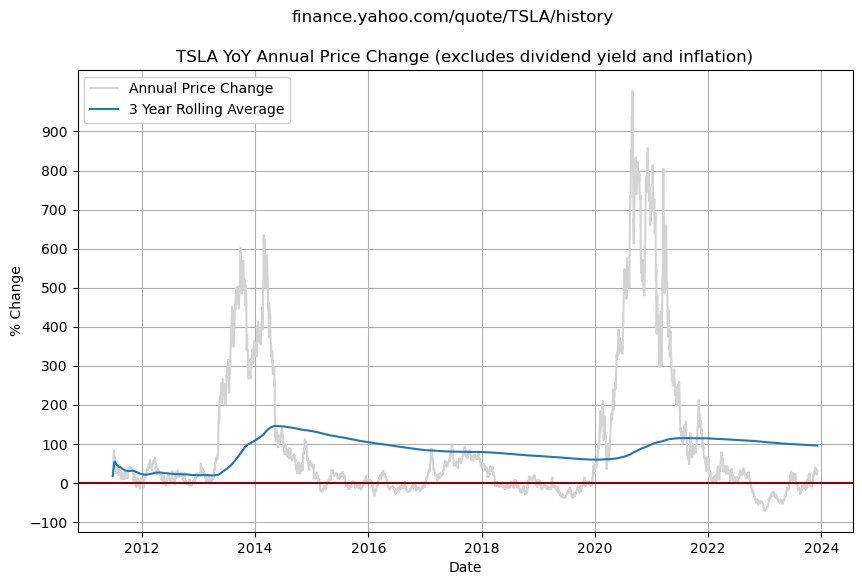

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Change'], label='Annual Price Change', color='lightgrey')
plt.plot(df.index, df['3_yr_rolling'], label='3 Year Rolling Average')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.suptitle('finance.yahoo.com/quote/TSLA/history')
plt.title('TSLA YoY Annual Price Change (excludes dividend yield and inflation)')
plt.yticks(range(-100, 1000, 100))
plt.grid(True)
plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='upper left')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()